# 1. Introduction to Processes, Threads and Processor Execution Types

2.3.3 => Memory layout of Python program


### Processes and Threads

Processes and threads are fundamental concepts in **computer science** and **operating systems** that enable programs to execute concurrently and efficiently. They are essential for **multitasking** and **parallelism** in modern computing systems.

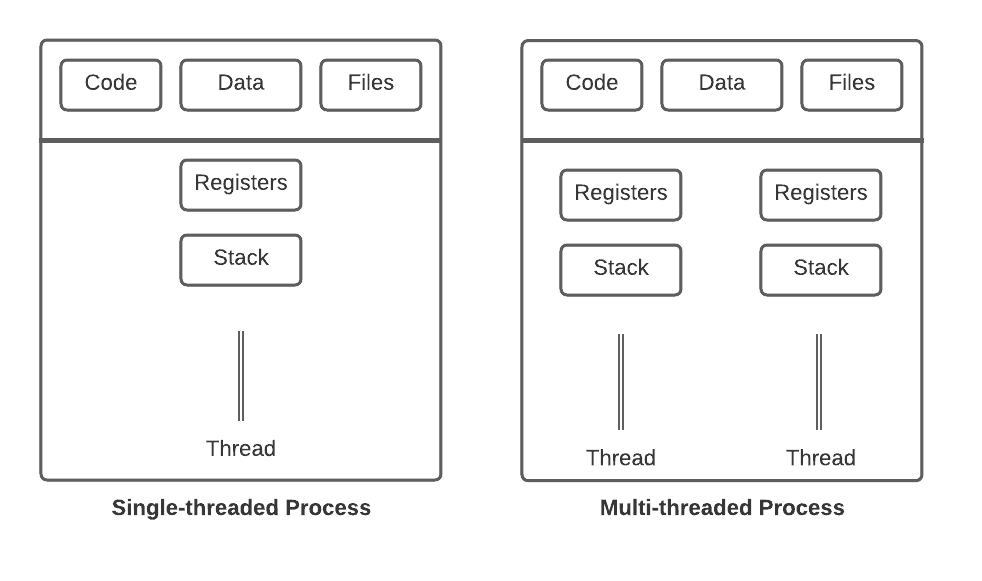

---

### Processes

- A **process** is an **independent and self-contained unit** of a running program.
- **Task Manager Example**
- Each process has:
  - Its own **memory space**
  - **Program code**
  - **Data**
  - **System resources**
- Processes run **concurrently**, allowing multiple programs to execute simultaneously.
- One process **cannot directly access** the memory of another process.

---

### Threads

- A **thread** is the **smallest unit of execution** within a process.
- All threads in the same process **share**:
  - The **same memory space**
  - **Resources** (e.g., file descriptors)
- Threads are **lightweight** and allow for efficient **concurrent execution**.
- Because of shared memory, threads can **easily communicate** and **share data**.

---

#### Summary

- Both **processes** and **threads** help achieve **concurrency** and **parallelism**.
- Use **processes** when:
  - Isolation and independent memory are needed.
  - The tasks are heavy and need dedicated resources.
- Use **threads** when:
  - Tasks are related and need to **share data quickly**.
  - **Lightweight** multitasking is preferred.

---


In [ ]:
multi-threading is one of the the most important topic in interviews
also it is considered as one of the toughest topic to master

In [ ]:
- Threads are what actually execute on the CPU.
- Process : It does not directly run on the CPU — it manages execution.
- Threads : A thread is the actual unit of execution. It is the part of the process that the CPU schedules and runs.
- Multiple threads in a process can run in parallel on multiple CPU cores.

Analogy
- A factory (process) can have many workers (threads). Only workers do the work — not the building itself.
- Process = A running application (e.g. MS Word or a Python script)
- Thread = A worker inside that app doing a task (e.g. autosave, spellcheck)

## Types of Processor Execution with Respect to a Process

Processor execution models determine how processes (and their tasks) are executed on CPUs. Based on execution behavior, these can be categorized as follows:

---

### 1. **Single-threaded Execution**

- The process has **only one thread** of execution.
- The CPU executes **one instruction at a time** from the process.
- No parallelism within the process.
- Simpler to implement, but cannot utilize multi-core CPUs effectively.

---

### 2. **Multi-threaded Execution**

- A single process contains **multiple threads**.
- Threads share the same memory and resources.
- **Concurrent or parallel execution** on multi-core CPUs.
- Useful for tasks like web servers, where multiple requests can be handled simultaneously.

 **Example**: A browser process with separate threads for rendering, JavaScript execution, and network.

---

### 3. **Multi-processing Execution**

- Multiple **independent processes** are executed.
- Each process has its **own memory space**.
- Parallel execution is possible if multiple CPU cores are available.
- Provides better **fault isolation** than multi-threading.

 **Example**: A photo editing app spawning a separate process for each filter operation.

---

### 4. **Time-sharing (Context Switching)**

- The CPU switches between multiple processes (or threads) **rapidly**.
- Creates an illusion of **simultaneous execution** on a single-core processor.
- Managed by the operating system using **context switching**.
- Essential for multitasking on traditional systems.

 **Example**: Typing in a word processor while music is playing in the background.

---

### 5. **Asynchronous/Non-blocking Execution**

- The process may use **asynchronous calls** to avoid blocking on I/O or long-running tasks.
- Improves efficiency by **not holding CPU** while waiting for an external operation.
- Often used in **event-driven** or **I/O-bound** applications.

 **Example**: Email confirmation when you place order on Flipkart. Email is sent in background.
 
 **why Async?** : Sending email may take 1-2 seconds. No need to block the user interface.

---

### Summary

| Execution Type       | Parallel? | Shared Memory? | Use Case                      |
|----------------------|-----------|----------------|-------------------------------|
| Single-threaded      | ❌        | N/A            | Simple sequential tasks       |
| Multi-threaded       | ✅        | ✅             | UI apps, servers              |
| Multi-processing     | ✅        | ❌             | CPU-intensive tasks           |
| Time-sharing         | ❌ (illusion) | Depends   | Multitasking on single core   |
| Asynchronous         | ✅ (I/O wait) | ✅         | High-performance I/O apps     |

---


### Important Point

| Concept         | Explanation                                                                        |
| --------------- | ---------------------------------------------------------------------------------- |
| **Concurrency** | Multiple processes are **in progress** at the same time (interleaved execution).   |
| **Parallelism** | Multiple processes are **executing at the same instant** (simultaneous execution). |

---

# 2. Multithreading in Python Programming

Multithreading in Python allows you to run multiple threads (smaller units of a process) concurrently.

---

### **Does Python Supports Multi-threading ?**

Python supports multi-threading, but with some important caveats — especially regarding true parallelism due to the Global Interpreter Lock (GIL).

1. The GIL is a mutex that allows only one thread to execute Python bytecode at a time, even on multi-core processors.

2. This means Python threads do not achieve true parallelism for CPU-bound tasks.

3. So, multi-threading is not ideal for CPU-heavy operations in CPython (the default Python interpreter).

** When Multi-threading Works Well**

Multi-threading is useful for I/O-bound tasks:
- Reading/writing files
- Making network requests
- Waiting on databases or APIs

Python threads can release the GIL while waiting on I/O, allowing other threads to run

---

In [ ]:
# GIL	Only one thread executes Python bytecode at a time (CPython).

### Summary
| Feature               | Multi-threading in Python |
| --------------------- | ------------------------- |
| Supported?            | ✅ Yes                     |
| True parallelism?     | ❌ No (because of GIL)     |
| Best for              | I/O-bound tasks           |
| CPU-bound alternative | ✅ Use `multiprocessing`   |


---

Python's threading module provides a way to create and manage threads.

Here's a brief overview of creating, starting a thread, synchronization, thread state, and thread termination:

**1. Creating a Thread:**


In [17]:
import threading
import time

# Thread function 1
def thread_function_1():
    for i in range(5):
        print("Thread 1: {}".format(i))
        time.sleep(2) # Sleep for 0.2 seconds # Simulates I/O (releases GIL)

# Create thread instances
thread_1 = threading.Thread(target=thread_function_1) # Creates a thread object.


**2. Starting a Thread:**

Once you've created a thread instance, you can start it using the start() method. This method internally calls the run() method you defined.

In [2]:
# Start the threads
thread_1.start()

Thread 1: 0
Thread 1: 1
Thread 1: 2
Thread 1: 3
Thread 1: 4


**3. Synchronization:**

When multiple threads access shared resources, it's essential to synchronize them to avoid data corruption or unexpected behavior. You can use locks from the threading module for synchronization:


**4. Thread State:**

You can check the state of a thread using the is_alive() method. It returns True if the thread is currently executing.



In [4]:
thread_1.is_alive()

False

**5. Thread Join:**

This method waits for the thread to complete its execution.

In [15]:
# Start the threads
thread_1.start()
print("from main thread")

# Wait for the thread to finish
thread_1.join() #Waits for the thread to complete before continuing the main thread.

Thread 1: 0
from main thread
Thread 1: 1
Thread 1: 2
Thread 1: 3
Thread 1: 4


In [18]:
# Start the threads
thread_1.start()

# Wait for the thread to finish
thread_1.join()

print("from main thread")

Thread 1: 0
Thread 1: 1
Thread 1: 2
Thread 1: 3
Thread 1: 4
from main thread


**Sleep method in Python**

In [12]:
import time
from datetime import datetime

print("Before sleep:", datetime.now())
time.sleep(2)  # Sleep for 0.2 seconds
print("After sleep:", datetime.now())

Before sleep: 2025-07-20 08:24:49.151873
After sleep: 2025-07-20 08:24:51.152966


**Threading Example**

In [23]:
import threading
import time

# Thread function 1
def thread_function_1():
    for i in range(5):
        time.sleep(0.01)  # Simulate some time-consuming task (I/O task)
        print("Thread 1: {}".format(i))

# Thread function 2
def thread_function_2():
    for i in range(5):
        time.sleep(0.01)  # Simulate some time-consuming task (I/O Task)
        print("Thread 2: {}".format(i))

# Create thread instances
thread_1 = threading.Thread(target=thread_function_1)
thread_2 = threading.Thread(target=thread_function_2)

print("Active threads before start:", threading.active_count())
for t in threading.enumerate():
    print(f"Thread Name: {t.name}, Alive: {t.is_alive()}")
print("\n\n\n")

# These threads are automatically started by Jupyter/IPython to manage
# MainThread => Your main Python execution thread.

# Start the threads
thread_2.start()
thread_1.start()

print("Active threads during execution:", threading.active_count())
for t in threading.enumerate():
    print(f"Thread Name: {t.name}, Alive: {t.is_alive()}")
print("\n\n\n")
    
# Wait for both threads to finish
thread_2.join()
thread_1.join()

print("Active threads after execution:", threading.active_count())
for t in threading.enumerate():
    print(f"Thread Name: {t.name}, Alive: {t.is_alive()}")
print("\n\n\n")
    
# Main thread continues here
print("Main thread: Done!")

Active threads before start: 6
Thread Name: MainThread, Alive: True
Thread Name: IOPub, Alive: True
Thread Name: Heartbeat, Alive: True
Thread Name: Control, Alive: True
Thread Name: IPythonHistorySavingThread, Alive: True
Thread Name: Thread-1, Alive: True




Active threads during execution: 8
Thread Name: MainThread, Alive: True
Thread Name: IOPub, Alive: True
Thread Name: Heartbeat, Alive: True
Thread Name: Control, Alive: True
Thread Name: IPythonHistorySavingThread, Alive: True
Thread Name: Thread-1, Alive: True
Thread Name: Thread-17 (thread_function_2), Alive: True
Thread Name: Thread-16 (thread_function_1), Alive: True




Thread 2: 0
Thread 1: 0
Thread 2: 1
Thread 1: 1
Thread 2: 2
Thread 1: 2
Thread 2: 3
Thread 1: 3
Thread 2: 4
Thread 1: 4
Active threads after execution: 6
Thread Name: MainThread, Alive: True
Thread Name: IOPub, Alive: True
Thread Name: Heartbeat, Alive: True
Thread Name: Control, Alive: True
Thread Name: IPythonHistorySavingThread, Alive: True
Thread Name: T

**Problem Practice : Concurrent Array Sum**

In [24]:
array = list(range(1, 10))
array

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [25]:
import threading

ARRAY_SIZE = 9
NUM_SEGMENTS = 3

# Object for synchronization
lock = threading.Lock()

def calculate_segment_sum(array, segment_id, segment_sum):
    start = segment_id * (ARRAY_SIZE // NUM_SEGMENTS)
    end = (segment_id + 1) * (ARRAY_SIZE // NUM_SEGMENTS)

    segment_sum[segment_id] = 0

    for i in range(start, end):
        segment_sum[segment_id] += array[i]

In [26]:
# Threads list stores all the threads
threads = []

# SegmentSums array stores the sum of each segment
segment_sums = [0] * NUM_SEGMENTS

# Create threads to calculate segment sums
for i in range(NUM_SEGMENTS):
    segment_id = i
    thread = threading.Thread(target=calculate_segment_sum,
                              args=(array, segment_id, segment_sums))
    threads.append(thread)

In [27]:
threads

[<Thread(Thread-18 (calculate_segment_sum), initial)>,
 <Thread(Thread-19 (calculate_segment_sum), initial)>,
 <Thread(Thread-20 (calculate_segment_sum), initial)>]

In [28]:
# Start all threads
for thread in threads:
    thread.start()

# Wait for all threads to finish
for thread in threads:
    thread.join()


In [29]:
# Calculate the total sum by combining segment sums
total_sum = sum(segment_sums)

# Display individual segment sums and the total sum
for i in range(NUM_SEGMENTS):
    print("Segment", i, "Sum:", segment_sums[i])

print("Total Sum:", total_sum)

Segment 0 Sum: 6
Segment 1 Sum: 15
Segment 2 Sum: 24
Total Sum: 45


---
### How to interrupt threads in Python ?

1. Using a shared variable or flag
2. Using the `Event` object
3. Using the Thread class's `join()` method

**Problem: How to interrupt thread using flag ?**

In [30]:
import threading
import time

# Shared flag
stop_flag = False

def my_thread_function():
    print("Thread started.")
    while not stop_flag:
        print("Thread is doing some work...")
        time.sleep(0.01)  # Simulate some work
    print("Thread stopped.")

# Create and start the thread
my_thread = threading.Thread(target=my_thread_function)
my_thread.start()

# In the main thread, we simulate some other work by sleeping for 50 millisecond.
time.sleep(0.05)

# Interrupt the thread by setting the stop flag
print("Interrupting the thread.")
stop_flag = True

# We call the join() method on the my_thread object to wait for the thread to complete its execution.
# This ensures that the main thread doesn't exit before the thread completes its work.
my_thread.join()
print("Main thread: Thread has completed.")

Thread started.
Thread is doing some work...
Thread is doing some work...
Thread is doing some work...
Thread is doing some work...
Thread is doing some work...
Interrupting the thread.
Thread stopped.
Main thread: Thread has completed.


---
**Problem: How to interrupt thread using Event object ?**

In [ ]:
import threading
import time

# Create an event object
stop_event = threading.Event()

def my_thread_function():
    while not stop_event.is_set():
        print("Thread is running...")
        time.sleep(0.01)  # Simulate some work

# Create and start the thread
my_thread = threading.Thread(target=my_thread_function)
my_thread.start()

# Wait for 50 milliseconds
time.sleep(0.05)

# Set the event to interrupt the thread
print("Interrupting the thread...")
stop_event.set()

# Wait for the thread to finish
my_thread.join()

print("Main thread: Done!")

Thread is running...
Thread is running...
Thread is running...
Thread is running...
Thread is running...
Interrupting the thread...
Main thread: Done!


This example demonstrates how to interrupt a thread using the Event object. The thread periodically checks the state of the stop_event, and once it's set, the thread exits gracefully.

---

# 3. Thread Synchronization in Python

In [ ]:
Thread synchronization is the process of coordinating multiple threads to ensure they safely share resources and don't interfere with each other.

In [ ]:
A race condition occurs when two or more threads or processes access shared data at the same time, 
and the final outcome depends on the order in which the threads execute.

In [ ]:
Imagine there are 2 printers in a lab, and 5 students want to print. A semaphore with value 2 ensures only 2 students can print at the same time.

In [ ]:
**GIL - The real bottleneck. **

In [ ]:
 Thread scheduling in Python involves two layers:

🧠 OS-level thread scheduling, and
🧱 Python’s Global Interpreter Lock (GIL)

In [ ]:
The OS handles which thread runs, when, and on which core.

In [ ]:
In CPython (the most widely used Python), only one thread can execute Python bytecode at a time.
The GIL is released every few milliseconds (default ≈ 5ms) or after a number of bytecode instructions.
Other threads wait for the GIL and then take turns.

In [ ]:
When a Python thread performs a blocking I/O operation (e.g., reading a file, waiting for a network response), it doesn’t need the CPU.
So, Python releases the GIL, letting other threads run in the meantime.

In [ ]:
Use threading for I/O-bound tasks (file I/O, HTTP, DB access).
Use multiprocessing for CPU-bound tasks (math, image processing).

In [ ]:
The correct answer should be 200000, but you'll often get less.

This is due to a race condition — both threads read the same value of count and then write back outdated values.

In [ ]:
🔐 Lock (Mutual Exclusion)
Python’s threading.Lock() is a mutex. => Under the hood it maps to an OS‑level mutex (e.g., a pthread mutex on Linux).
A Lock ensures that only one thread can access a block of code at a time.

 What with lock: does:
lock.acquire() before the block
lock.release() after the block

This ensures that:
Only one thread modifies count at a time
No race conditions

In [ ]:
A semaphore is a counter-based synchronization primitive that controls access to a shared resource by multiple threads.
It allows up to N threads to access the resource at the same time.
When the counter reaches zero, any additional thread trying to acquire it will block (wait) until another thread releases it.

sem.acquire()	Decrease the semaphore count (or block if 0)
sem.release()	Increase the count, allow waiting threads

Thread synchronization in Python is about **coordinating the execution of multiple threads** to ensure:

- Safe access to **shared resources**
- Avoidance of **race conditions**

---

### Why Synchronization is Needed?

When multiple threads access shared data **without synchronization**, it may lead to:
- Corrupted data
- Unexpected behavior
- Difficult-to-debug issues

---

Python provides several mechanisms for thread synchronization, including locks, semaphores, events, and conditions.

An overview of two common thread synchronization mechanisms in Python
---

### 1. Locks

- Locks are the most basic synchronization mechanism in Python. They allow only one thread to acquire the lock at a time.
- The `threading.Lock` class provides a simple lock implementation that can be used to protect critical sections of code.
- Threads acquire the lock using the `acquire()` method and release it using the `release()` method.

---
### 2. Semaphores
- Semaphores are used to control access to a shared resource with limited capacity. They maintain a count representing the number of available resources.
-The `threading.Semaphore` class provides `semaphore` objects that can be used to synchronize access to shared resources.
- Threads acquire resources from the semaphore using the `acquire()` method and release them using the `release()` method.

---


In [1]:
# Locks Example

import threading
import time

# Global variable shared among threads
shared_variable = 0

# Create a lock
lock = threading.Lock()

# Function to increment the shared variable
def increment():
    global shared_variable
    for _ in range(10):
        # Acquire the lock before modifying the shared variable
        lock.acquire()
        shared_variable += 1
        # Release the lock after modifying the shared variable
        lock.release()

# Create multiple threads to increment the shared variable
threads = []
for _ in range(5):
    thread = threading.Thread(target=increment)
    thread.start()
    threads.append(thread)

# Wait for all threads to complete
for thread in threads:
    thread.join()

# Print the final value of the shared variable
print("Final value of shared variable:", shared_variable)

Final value of shared variable: 50


In [ ]:
# Semaphore Example

import threading
import time

# Define a semaphore with a maximum of 2 resources
semaphore = threading.Semaphore(2)

# Function to access the shared resource
def access_resource(thread_id):
    print(f"Thread {thread_id} is trying to acquire the semaphore.")
    # Acquire the semaphore
    semaphore.acquire()
    print(f"Thread {thread_id} has acquired the semaphore.")
    try:
        # Simulate accessing the shared resource
        print(f"Thread {thread_id} is accessing the shared resource.")
        time.sleep(0.002)
    finally:
        # Release the semaphore
        semaphore.release()
        print(f"Thread {thread_id} has released the semaphore.")

# Create multiple threads to access the shared resource
threads = []
for i in range(5):
    thread = threading.Thread(target=access_resource, args=(i,))
    threads.append(thread)
    thread.start()

# Wait for all threads to complete
for thread in threads:
    thread.join()

print("All threads have completed their execution.")

Thread 0 is trying to acquire the semaphore.
Thread 0 has acquired the semaphore.
Thread 0 is accessing the shared resource.
Thread 0 has released the semaphore.
Thread 1 is trying to acquire the semaphore.
Thread 1 has acquired the semaphore.
Thread 1 is accessing the shared resource.
Thread 2 is trying to acquire the semaphore.
Thread 2 has acquired the semaphore.
Thread 2 is accessing the shared resource.
Thread 3 is trying to acquire the semaphore.
Thread 4 is trying to acquire the semaphore.
Thread 1 has released the semaphore.
Thread 3 has acquired the semaphore.
Thread 3 is accessing the shared resource.
Thread 2 has released the semaphore.
Thread 4 has acquired the semaphore.
Thread 4 is accessing the shared resource.
Thread 3 has released the semaphore.
Thread 4 has released the semaphore.
All threads have completed their execution.


---
**Problem: Concurrent Counter with Locks**
```
You are tasked with implementing a concurrent counter in Python using locks. The counter should support the following operations:

increment(): Increment the counter by 1.
decrement(): Decrement the counter by 1.
get_count(): Get the current value of the counter.

You need to ensure that the counter operations are thread-safe and that multiple threads can increment and decrement the counter concurrently without data corruption.
```

In [2]:
import threading

class Counter:
    def __init__(self):
        # Initialize the counter and a lock
        self.count = 0
        self.lock = threading.Lock()

    def increment(self):
        # Acquire the lock before modifying the counter
        with self.lock:
            self.count += 1

    def decrement(self):
        # Acquire the lock before modifying the counter
        with self.lock:
            self.count -= 1

    def get_count(self):
        # Acquire the lock before reading the counter
        with self.lock:
            return self.count


counter = Counter()

# Function to increment the counter
def increment_counter():
    for _ in range(1000):
        counter.increment()

# Function to decrement the counter
def decrement_counter():
    for _ in range(100):
        counter.decrement()

# Create two threads to increment and decrement the counter concurrently
thread1 = threading.Thread(target=increment_counter)
thread2 = threading.Thread(target=decrement_counter)

thread1.start()
thread2.start()

thread1.join()
thread2.join()

# Print the final value of the counter
print("Final count:", counter.get_count())


Final count: 900
